In [1]:
import pandas as pd  
import numpy as np 
import matplotlib.pyplot as plt  
import seaborn as sns
from scipy.stats import norm
import statsmodels.formula.api as sm

In [2]:
hiv = pd.read_csv('../data/New HIV.csv')

In [3]:
hiv.head()

,Country,Year,New_HIV_infections
0,Albania,2022,100.0
1,Bahamas,2022,100.0
2,Barbados,2022,100.0
3,Bhutan,2022,100.0
4,Comoros,2022,100.0


In [4]:
gdp_le = pd.read_csv('../data/gdp_le.csv')

In [5]:
gdp_le.head()

,Unnamed: 0,Country,Year,GDP_Per_Capita,Continent,Life_Expectancy
0,0,Afghanistan,2020,1970.560169,Asia,62.575
1,1,Afghanistan,2019,2065.036235,Asia,63.565
2,2,Afghanistan,2018,2033.804389,Asia,63.081
3,3,Afghanistan,2017,2058.400221,Asia,63.016
4,4,Afghanistan,2016,2057.067978,Asia,63.136


In [6]:
gdp_hiv = pd.merge(gdp_le, hiv, on=('Country', 'Year'), how='inner')

In [7]:
gdp_hiv.head()

,Unnamed: 0,Country,Year,GDP_Per_Capita,Continent,Life_Expectancy,New_HIV_infections
0,0,Afghanistan,2020,1970.560169,Asia,62.575,1100.0
1,1,Afghanistan,2019,2065.036235,Asia,63.565,1200.0
2,2,Afghanistan,2018,2033.804389,Asia,63.081,1100.0
3,3,Afghanistan,2017,2058.400221,Asia,63.016,1000.0
4,4,Afghanistan,2016,2057.067978,Asia,63.136,1100.0


In [8]:
gdp_hiv.tail()

,Unnamed: 0,Country,Year,GDP_Per_Capita,Continent,Life_Expectancy,New_HIV_infections
3238,5226,Zimbabwe,2004,1979.200783,Africa,44.502,100000.0
3239,5227,Zimbabwe,2003,2107.840306,Africa,43.393,100000.0
3240,5228,Zimbabwe,2002,2545.348182,Africa,44.565,110000.0
3241,5229,Zimbabwe,2001,2800.952116,Africa,41.957,120000.0
3242,5230,Zimbabwe,2000,2771.060576,Africa,44.686,120000.0


In [9]:
gdp_hiv.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3243 entries, 0 to 3242
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          3243 non-null   int64  
 1   Country             3243 non-null   object 
 2   Year                3243 non-null   int64  
 3   GDP_Per_Capita      3243 non-null   float64
 4   Continent           3243 non-null   object 
 5   Life_Expectancy     3203 non-null   float64
 6   New_HIV_infections  2329 non-null   float64
dtypes: float64(3), int64(2), object(2)
memory usage: 202.7+ KB


In [10]:
gdp_hiv.shape

(3243, 7)

In [11]:
gdp_hiv

,Unnamed: 0,Country,Year,GDP_Per_Capita,Continent,Life_Expectancy,New_HIV_infections
0,0,Afghanistan,2020,1970.560169,Asia,62.575,1100.0
1,1,Afghanistan,2019,2065.036235,Asia,63.565,1200.0
2,2,Afghanistan,2018,2033.804389,Asia,63.081,1100.0
3,3,Afghanistan,2017,2058.400221,Asia,63.016,1000.0
4,4,Afghanistan,2016,2057.067978,Asia,63.136,1100.0
...,...,...,...,...,...,...,...
3238,5226,Zimbabwe,2004,1979.200783,Africa,44.502,100000.0
3239,5227,Zimbabwe,2003,2107.840306,Africa,43.393,100000.0
3240,5228,Zimbabwe,2002,2545.348182,Africa,44.565,110000.0
3241,5229,Zimbabwe,2001,2800.952116,Africa,41.957,120000.0


In [12]:
gdp_hiv.nlargest(5, 'New_HIV_infections')

,Unnamed: 0,Country,Year,GDP_Per_Capita,Continent,Life_Expectancy,New_HIV_infections
2759,4283,South Africa,2001,11181.689211,Africa,57.261,510000.0
2760,4284,South Africa,2000,11033.856309,Africa,58.470,510000.0
2758,4282,South Africa,2002,11449.818315,Africa,55.666,500000.0
2757,4281,South Africa,2003,11644.099767,Africa,54.331,490000.0
2756,4280,South Africa,2004,12027.080619,Africa,54.043,480000.0


In [13]:
gdp_hiv=gdp_hiv.dropna()

In [14]:
gdp_hiv_01 = gdp_hiv.loc[gdp_hiv.Year.isin([2001])]

In [15]:
gdp_hiv_01

,Unnamed: 0,Country,Year,GDP_Per_Capita,Continent,Life_Expectancy,New_HIV_infections
38,38,Albania,2001,6441.449833,Europe,75.639000,100.0
59,69,Algeria,2001,8855.008927,Africa,70.823000,530.0
80,100,Angola,2001,4746.660523,Africa,46.590000,23000.0
143,193,Armenia,2001,4464.385831,Europe,70.932000,100.0
164,255,Australia,2001,38474.153332,Oceania,79.634146,790.0
...,...,...,...,...,...,...,...
3094,4892,Uganda,2001,1286.170601,Africa,49.006000,93000.0
3157,5047,Uruguay,2001,13901.993905,South America,75.285000,570.0
3178,5078,Uzbekistan,2001,3052.281504,Asia,66.087000,590.0
3220,5198,Zambia,2001,2042.537498,Africa,46.019000,86000.0


In [16]:
gdp_hiv_01.sort_values('New_HIV_infections', ascending=False)

,Unnamed: 0,Country,Year,GDP_Per_Capita,Continent,Life_Expectancy,New_HIV_infections
2759,4283,South Africa,2001,11181.689211,Africa,57.261000,510000.0
2041,3181,Mozambique,2001,687.149426,Africa,50.065000,160000.0
3241,5229,Zimbabwe,2001,2800.952116,Africa,41.957000,120000.0
1558,2382,Kenya,2001,3219.779202,Africa,54.508000,120000.0
3094,4892,Uganda,2001,1286.170601,Africa,49.006000,93000.0
...,...,...,...,...,...,...,...
773,1212,Cyprus,2001,33878.074219,Europe,76.989000,100.0
1747,2702,Luxembourg,2001,101143.147977,Europe,77.824390,100.0
1327,2051,Iceland,2001,42626.923068,Europe,80.690244,100.0
38,38,Albania,2001,6441.449833,Europe,75.639000,100.0


In [17]:
hiv_top5 = gdp_hiv.loc[gdp_hiv.Country.isin(['South Africa', 'Mozambique', 'Zimbabwe', 'Kenya', 'Uganda'])]
hiv_top5

,Unnamed: 0,Country,Year,GDP_Per_Capita,Continent,Life_Expectancy,New_HIV_infections
1539,2363,Kenya,2020,4349.010163,Africa,62.675,28000.0
1540,2364,Kenya,2019,4459.210605,Africa,62.943,28000.0
1541,2365,Kenya,2018,4339.774633,Africa,62.676,29000.0
1542,2366,Kenya,2017,4203.585011,Africa,62.481,34000.0
1543,2367,Kenya,2016,4144.744334,Africa,62.163,37000.0
...,...,...,...,...,...,...,...
3238,5226,Zimbabwe,2004,1979.200783,Africa,44.502,100000.0
3239,5227,Zimbabwe,2003,2107.840306,Africa,43.393,100000.0
3240,5228,Zimbabwe,2002,2545.348182,Africa,44.565,110000.0
3241,5229,Zimbabwe,2001,2800.952116,Africa,41.957,120000.0


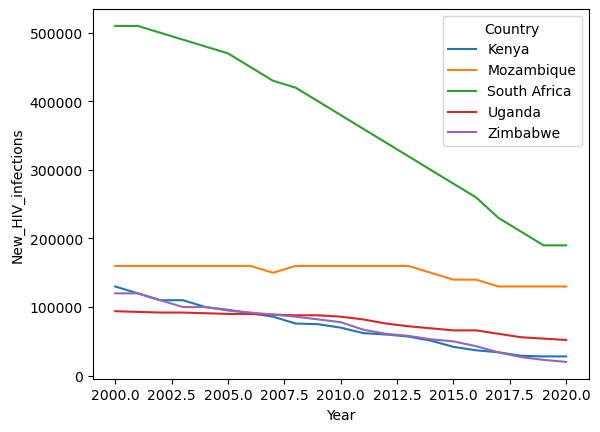

In [18]:
sns.lineplot(hiv_top5, 
                x="Year", 
                y="New_HIV_infections",
                hue='Country');

In [20]:
hiv_bot5 = gdp_hiv.loc[gdp_hiv.Country.isin(['Bangladesh', 'Algeria', 'Costa Rica', 'Uruguay', 'Uzbekistan'])]
hiv_bot5

,Unnamed: 0,Country,Year,GDP_Per_Capita,Continent,Life_Expectancy,New_HIV_infections
40,50,Algeria,2020,10735.382539,Africa,74.453,2100.0
41,51,Algeria,2019,11521.984210,Africa,76.474,2000.0
42,52,Algeria,2018,11630.679409,Africa,76.066,2000.0
43,53,Algeria,2017,11737.401235,Africa,75.743,2000.0
44,54,Algeria,2016,11826.151380,Africa,75.732,1900.0
...,...,...,...,...,...,...,...
3175,5075,Uzbekistan,2004,3430.628559,Asia,67.401,2100.0
3176,5076,Uzbekistan,2003,3229.847924,Asia,67.040,1100.0
3177,5077,Uzbekistan,2002,3134.961174,Asia,66.604,820.0
3178,5078,Uzbekistan,2001,3052.281504,Asia,66.087,590.0


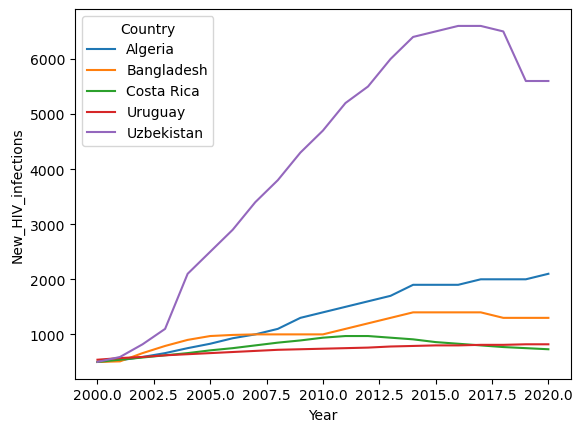

In [21]:
sns.lineplot(hiv_bot5, 
                x="Year", 
                y="New_HIV_infections",
                hue='Country');

In [22]:
gdp_hiv[['Life_Expectancy', 'GDP_Per_Capita', 'New_HIV_infections']].corr()

,Life_Expectancy,GDP_Per_Capita,New_HIV_infections
Life_Expectancy,1.000000,0.639351,-0.306387
GDP_Per_Capita,0.639351,1.000000,-0.132692
New_HIV_infections,-0.306387,-0.132692,1.000000


<Axes: xlabel='New_HIV_infections', ylabel='GDP_Per_Capita'>

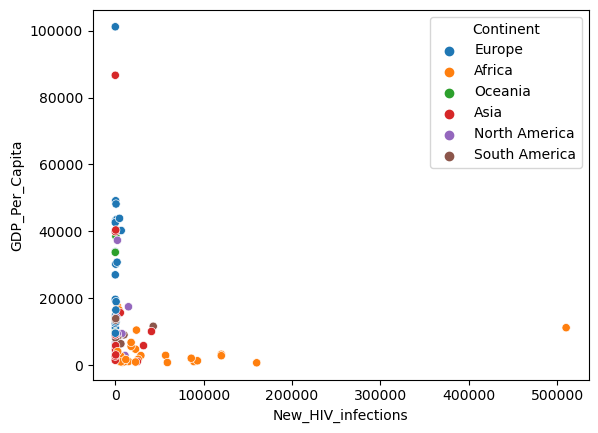

In [23]:
sns.scatterplot(gdp_hiv_01, 
                x="New_HIV_infections", 
                y="GDP_Per_Capita", 
                hue="Continent")

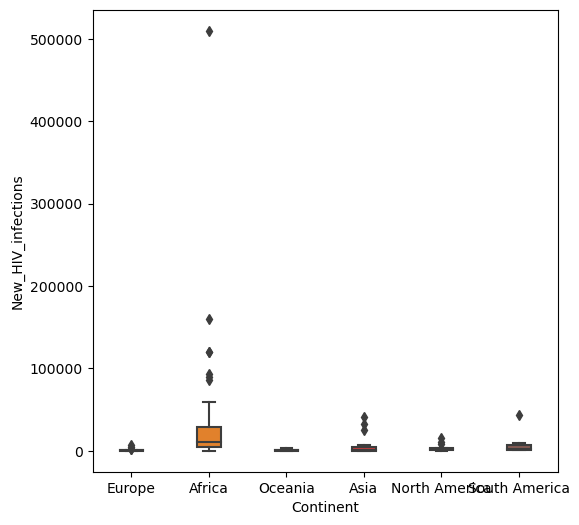

In [24]:
plt.figure(figsize = (6,6))
sns.boxplot(y = gdp_hiv_01['New_HIV_infections'], x=gdp_hiv_01['Continent'], width=.3);

In [25]:
gdphiv01_adj=gdp_hiv_01.loc[gdp_hiv_01['New_HIV_infections']>500]

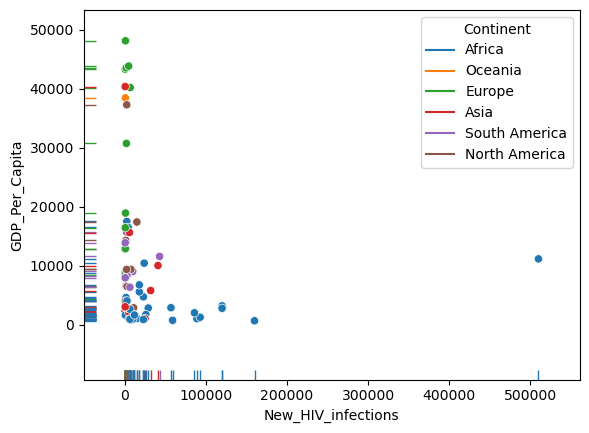

In [26]:
sns.scatterplot(gdphiv01_adj, 
                x="New_HIV_infections", 
                y="GDP_Per_Capita", 
                hue="Continent")
sns.rugplot(gdphiv01_adj, 
                x="New_HIV_infections", 
                y="GDP_Per_Capita", 
                hue="Continent");

In [27]:
gdphiv01_adj=gdphiv01_adj.assign(gdp_log=np.log(gdphiv01_adj["GDP_Per_Capita"]))
gdphiv01_adj.head()

,Unnamed: 0,Country,Year,GDP_Per_Capita,Continent,Life_Expectancy,New_HIV_infections,gdp_log
59,69,Algeria,2001,8855.008927,Africa,70.823000,530.0,9.088739
80,100,Angola,2001,4746.660523,Africa,46.590000,23000.0,8.465197
164,255,Australia,2001,38474.153332,Oceania,79.634146,790.0,10.557742
206,317,Azerbaijan,2001,4360.459441,Europe,65.510000,810.0,8.380333
248,379,Bangladesh,2001,2365.785074,Asia,66.135000,510.0,7.768865


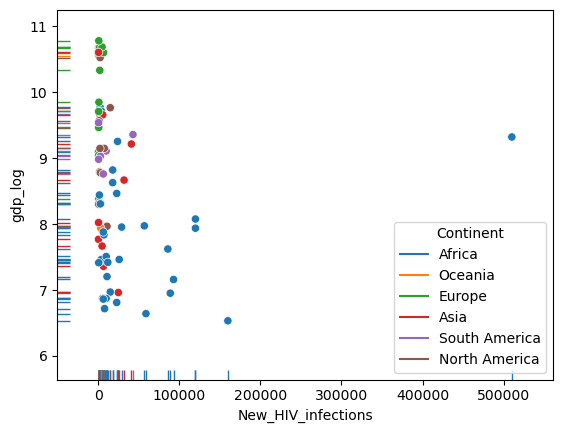

In [28]:
sns.scatterplot(gdphiv01_adj, 
                x="New_HIV_infections", 
                y="gdp_log", 
                hue="Continent")
sns.rugplot(gdphiv01_adj, 
                x="New_HIV_infections", 
                y="gdp_log", 
                hue="Continent");

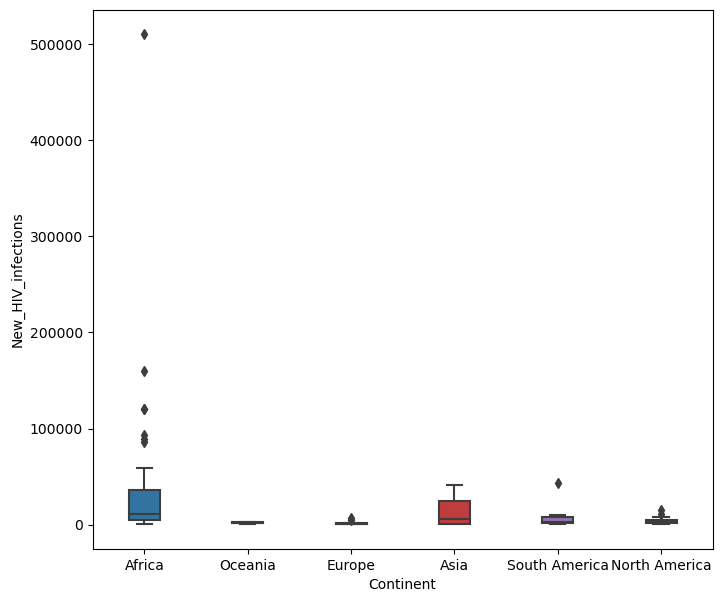

In [29]:
plt.figure(figsize = (8,7))
sns.boxplot(y = gdphiv01_adj['New_HIV_infections'], x=gdphiv01_adj['Continent'], width=.3);

In [30]:
top_gdp= gdphiv01_adj.sort_values('GDP_Per_Capita', ascending=False)
top_gdp = gdp_hiv.loc[gdp_hiv.Country.isin(['Netherlands', 'Italy', 'Germany', 'Belgium', 'Saudi Arabia'])]
top_gdp

,Unnamed: 0,Country,Year,GDP_Per_Capita,Continent,Life_Expectancy,New_HIV_infections
292,453,Belgium,2020,48752.501591,Europe,80.695122,500.0
293,454,Belgium,2019,51937.423609,Europe,81.995122,500.0
294,455,Belgium,2018,51139.067613,Europe,81.595122,500.0
295,456,Belgium,2017,50442.270542,Europe,81.492683,500.0
296,457,Belgium,2016,49829.927389,Europe,81.439024,530.0
...,...,...,...,...,...,...,...
2580,4005,Saudi Arabia,2004,43210.230231,Asia,74.153000,200.0
2581,4006,Saudi Arabia,2003,41229.793767,Asia,73.628000,500.0
2582,4007,Saudi Arabia,2002,38170.205997,Asia,73.337000,500.0
2583,4008,Saudi Arabia,2001,40393.953516,Asia,72.974000,600.0


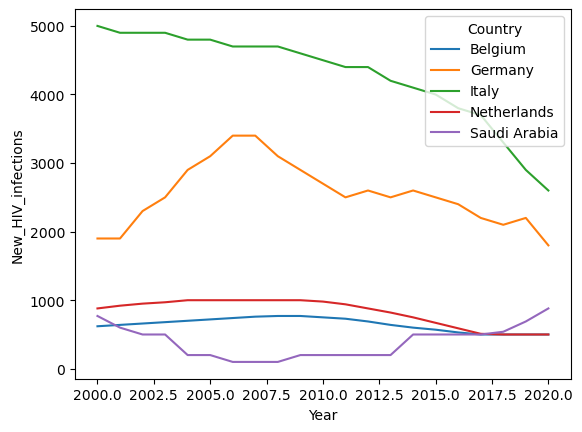

In [31]:
sns.lineplot(top_gdp, 
                x="Year", 
                y="New_HIV_infections",
                hue='Country');

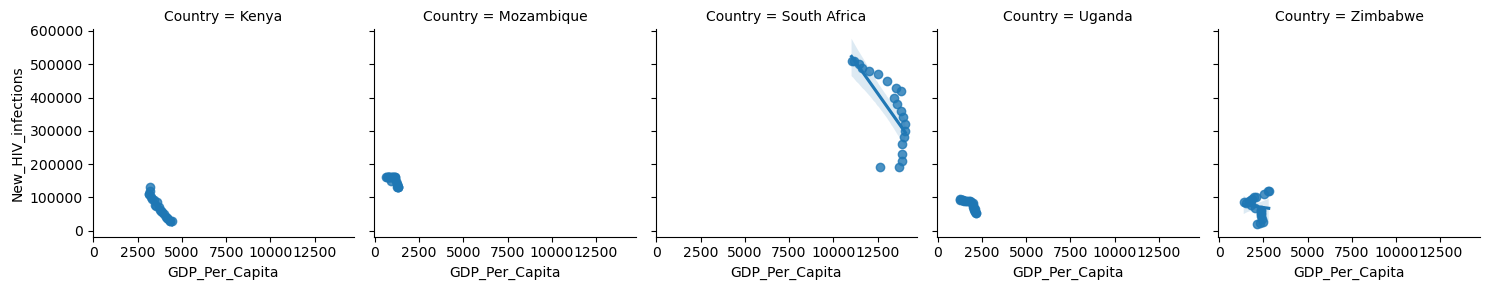

In [32]:
G = sns.FacetGrid(hiv_top5, col="Country", hue="Continent")
G.map(sns.regplot, "GDP_Per_Capita", "New_HIV_infections")